<a href="https://colab.research.google.com/github/dcandrader/IA_2025.2/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [3]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.31GB/s]


In [4]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
#Lectura de datos
d_train = pd.read_csv('train.csv')

In [6]:
d_train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [7]:
#Número de columnas y filas
print("Número de columnas:", d_train.shape[1])
print("Número de filas:", d_train.shape[0])

Número de columnas: 21
Número de filas: 692500


In [8]:
#Valores faltantes por columna
k = d_train.isna().sum()
k[k!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_TIENEINTERNET.1,26629


Text(0.5, 1.0, 'Valores faltantes')

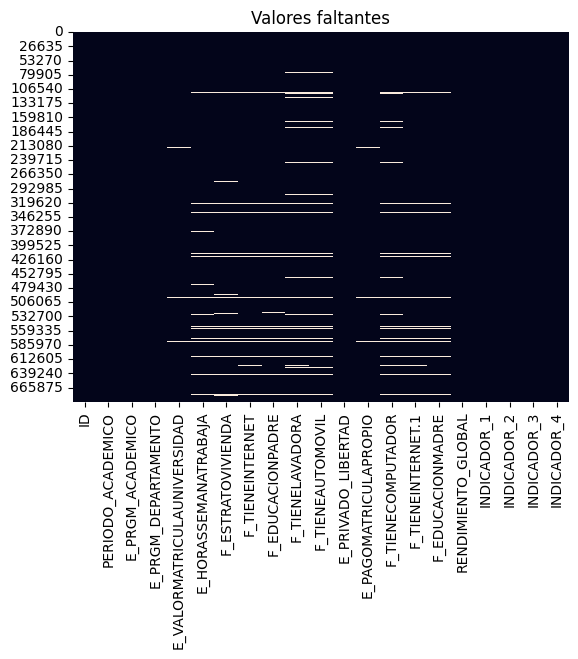

In [9]:
#Gráfica de valores faltantes
sns.heatmap(d_train.isna(), cbar=False)
plt.title("Valores faltantes")

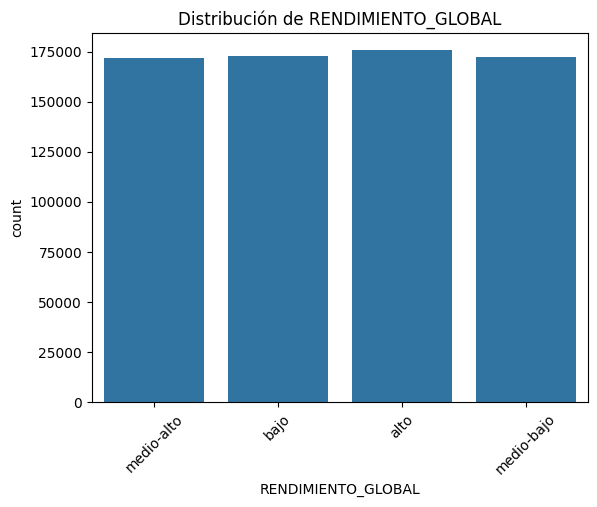

In [10]:
#Comportamiento de variable objetivo
sns.countplot(data=d_train, x='RENDIMIENTO_GLOBAL')
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xticks(rotation=45)
plt.show()

In [11]:
#Tipo de datos
d_train.dtypes

,0
ID,int64
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object


In [12]:
#Convertir periodo académico en variable categórica
orden = sorted(d_train['PERIODO_ACADEMICO'].unique())  # orden alfabético (que funciona si los nombres son consistentes)

d_train['PERIODO_ACADEMICO'] = pd.Categorical(
    d_train['PERIODO_ACADEMICO'],
    categories=orden,
    ordered=True
)

#Converir "objet" en "category"
for col in d_train.select_dtypes(include='object').columns:
    d_train[col] = d_train[col].astype('category')

In [13]:
#Tipo de datos
d_train.dtypes

,0
ID,int64
PERIODO_ACADEMICO,category
E_PRGM_ACADEMICO,category
E_PRGM_DEPARTAMENTO,category
E_VALORMATRICULAUNIVERSIDAD,category
E_HORASSEMANATRABAJA,category
F_ESTRATOVIVIENDA,category
F_TIENEINTERNET,category
F_EDUCACIONPADRE,category
F_TIENELAVADORA,category


In [14]:
#Inspeccionar columnas numericas
d_train.describe()

,ID,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,0.268629,0.259996,0.262087,0.262903
std,285585.209455,0.122130,0.093480,0.058862,0.067944
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,0.657000,0.487000,0.320000,0.332000


In [15]:
#Inspeccionar columnas categóricas
d_train.describe(include='category')

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,692500,692500,692500,686213,661643,660363,665871,669322,652727,648877,692500,686002,654397,665871,668836,692500
unique,9,948,31,8,5,7,2,12,2,2,2,2,2,2,12,4
top,20195,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,180873,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619


In [16]:
#Valores únicos de columnas categóricas
for col in d_train.describe(include='category').columns:
    print(col, d_train[col].unique())

PERIODO_ACADEMICO [20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196]
Categories (9, int64): [20183 < 20184 < 20194 < 20195 ... 20202 < 20203 < 20212 < 20213]
E_PRGM_ACADEMICO ['ENFERMERIA', 'DERECHO', 'MERCADEO Y PUBLICIDAD', 'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', ..., 'PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PA..., 'QUIMICA Y FARMACIA', 'LICENCIATURA EN EDUCACON FISICA, RECREACION Y..., 'COMUNICACIÓN SOCIAL Y PERIODISMO', 'PROFESIONAL EN INVESTIGACIÓN CRIMINAL']
Length: 948
Categories (948, object): ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES', 'ACTIVIDAD FISICA Y DEPORTE', 'ACUICULTURA',
                           'ADMINISTRACION', ..., 'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'TURISMO',
                           'URBANISMO', 'ZOOTECNIA']
E_PRGM_DEPARTAMENTO ['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', ..., 'ARAUCA', 'GUAVIARE', 'AMAZONAS', 'VAUPES', 'SAN ANDRES']
Length: 31
Categories (31, object): ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO',

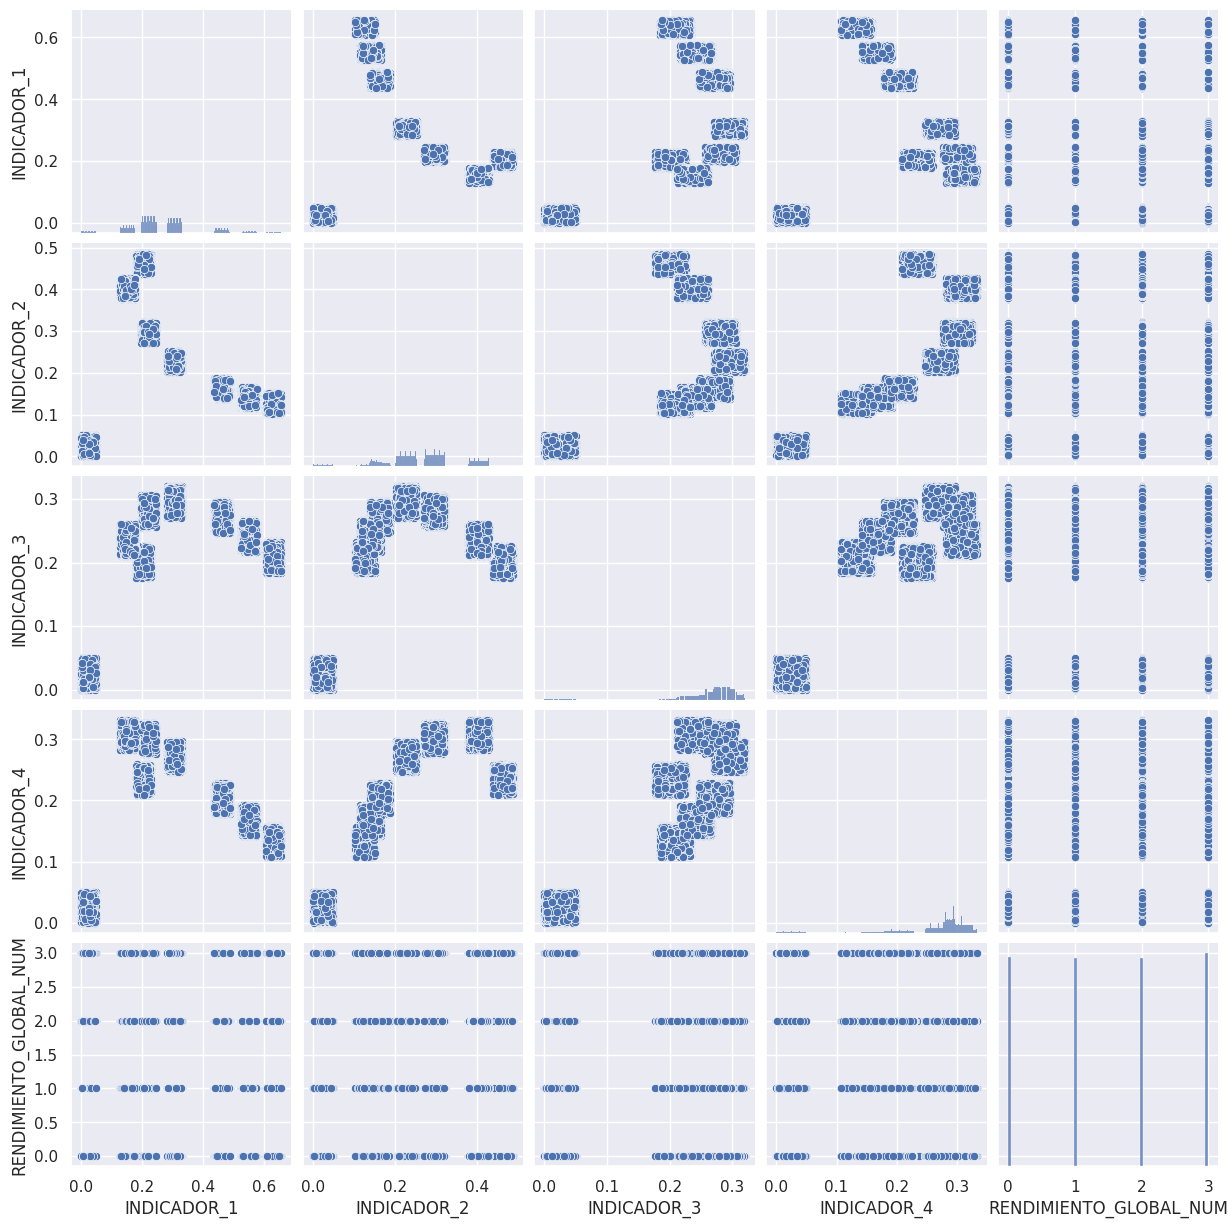

In [17]:
mapeo = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
d_train['RENDIMIENTO_GLOBAL_NUM'] = d_train['RENDIMIENTO_GLOBAL'].map(mapeo).astype(int)

cols = ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'RENDIMIENTO_GLOBAL_NUM']
sns.set()
sns.pairplot(d_train[cols])


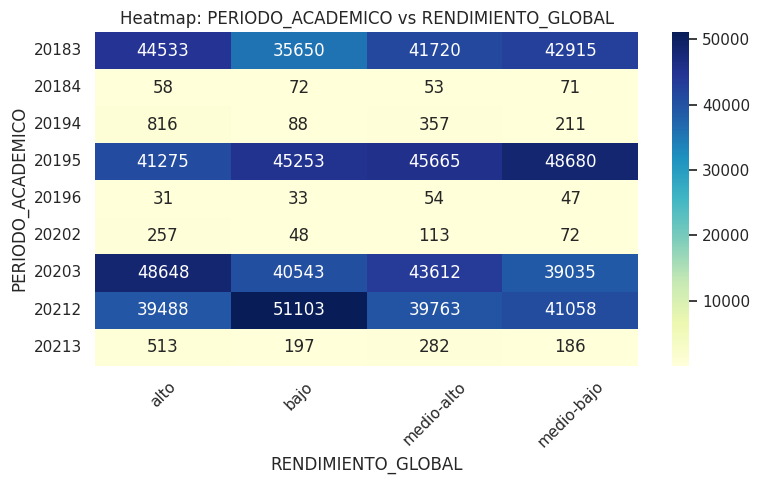

/tmp/ipython-input-3282933089.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


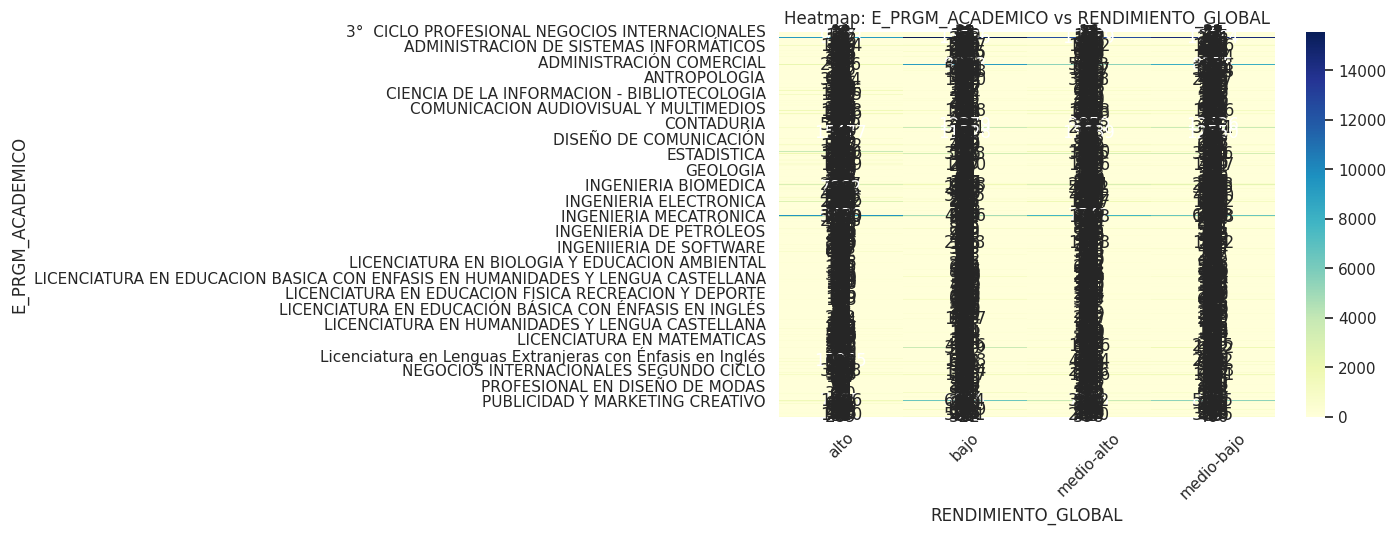

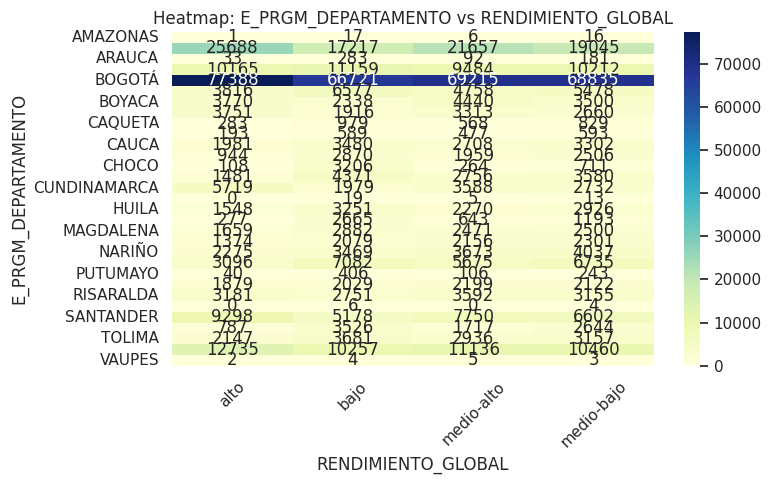

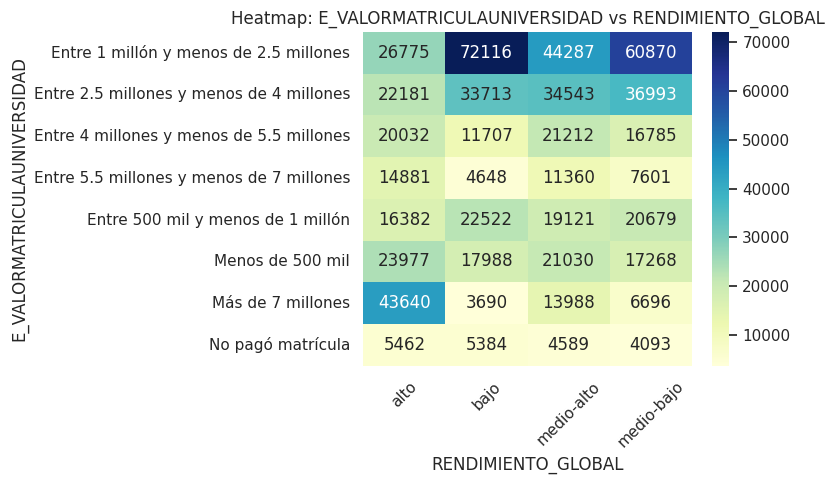

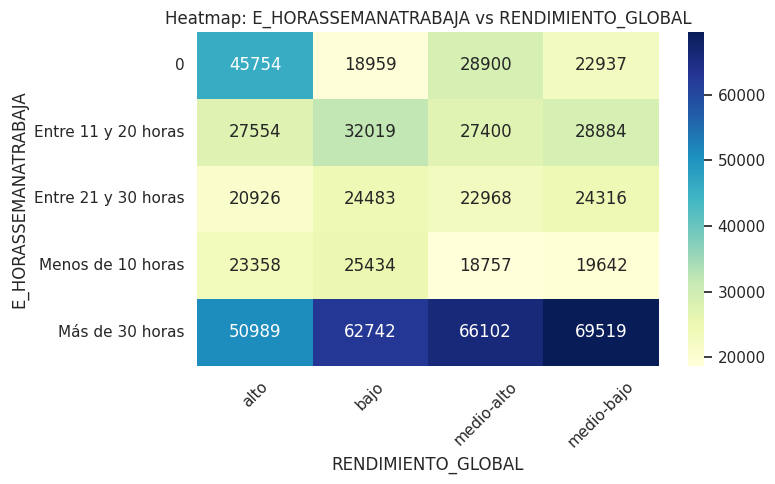

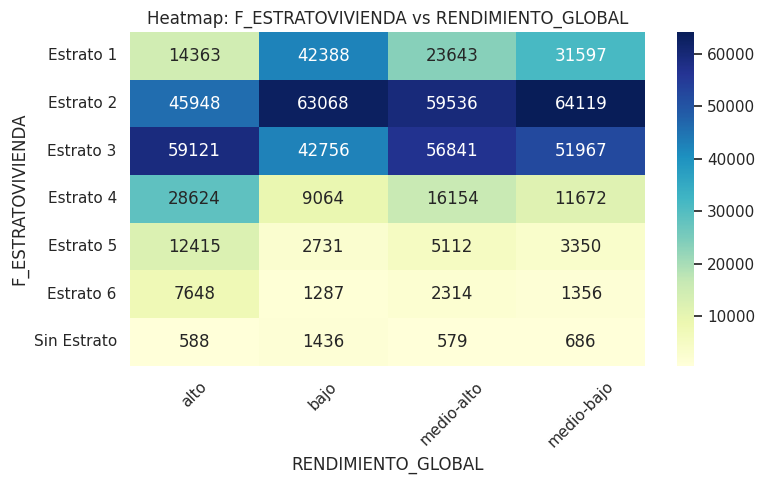

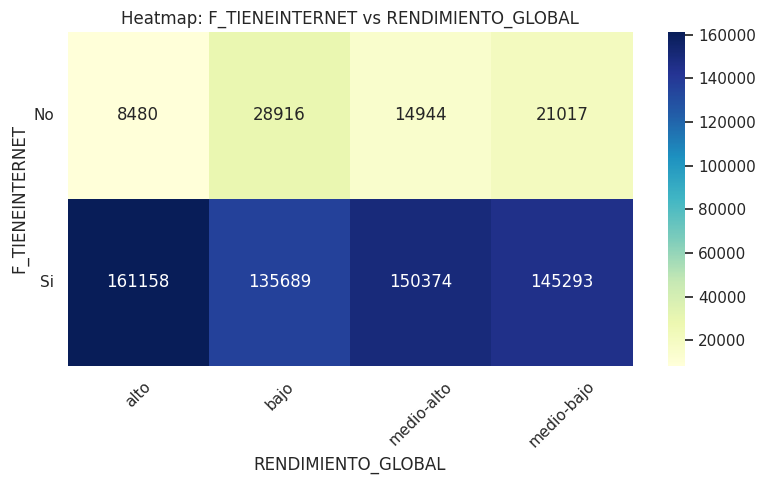

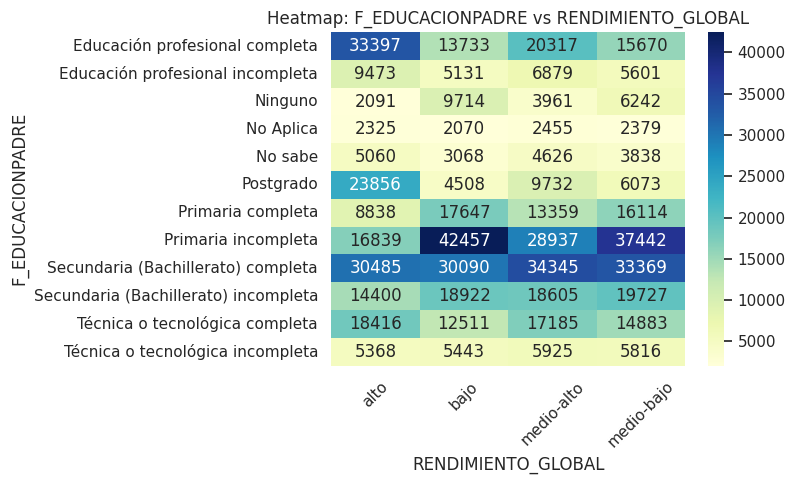

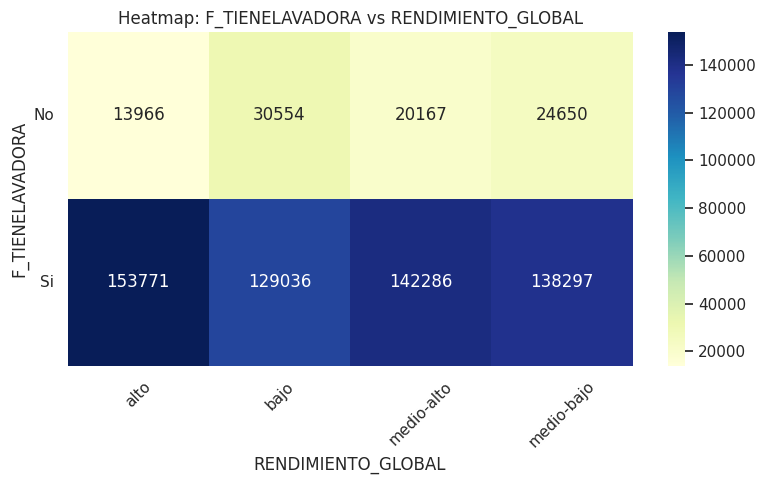

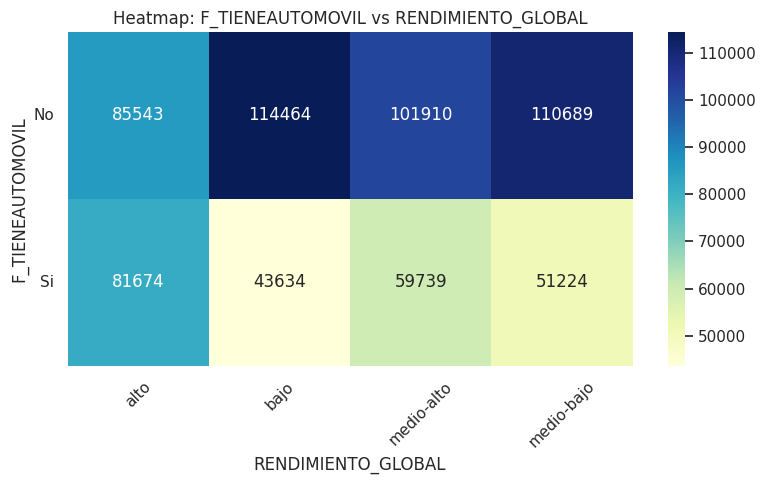

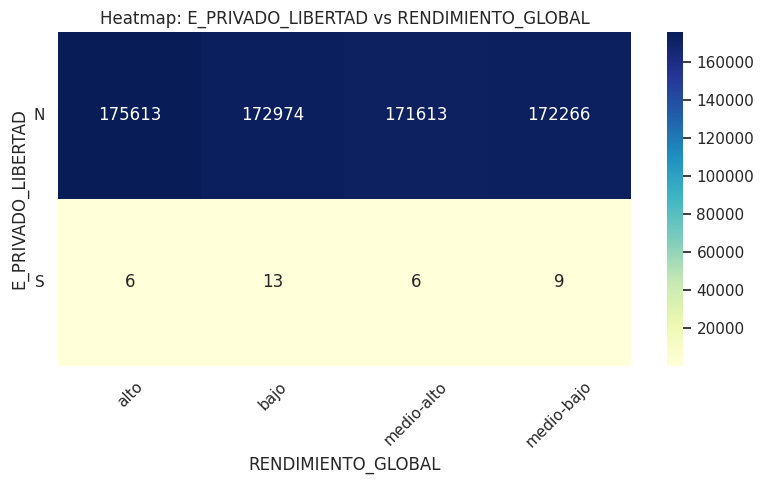

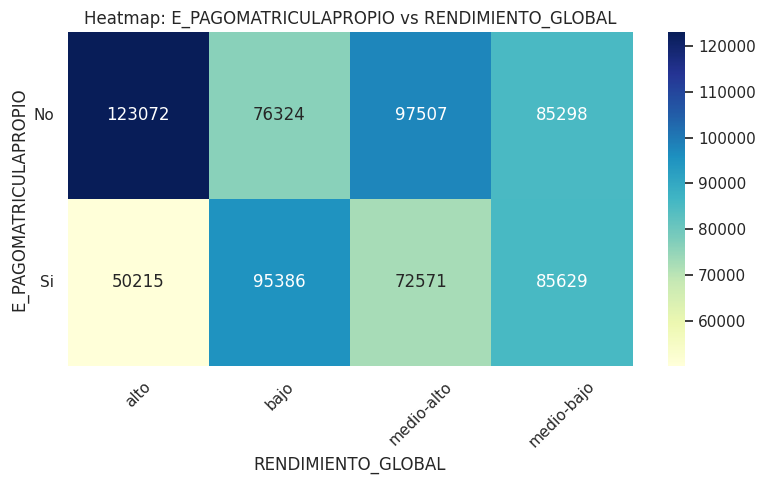

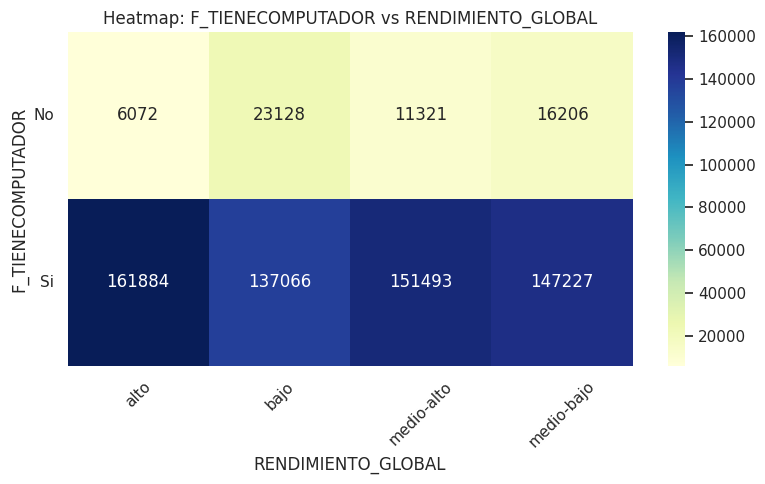

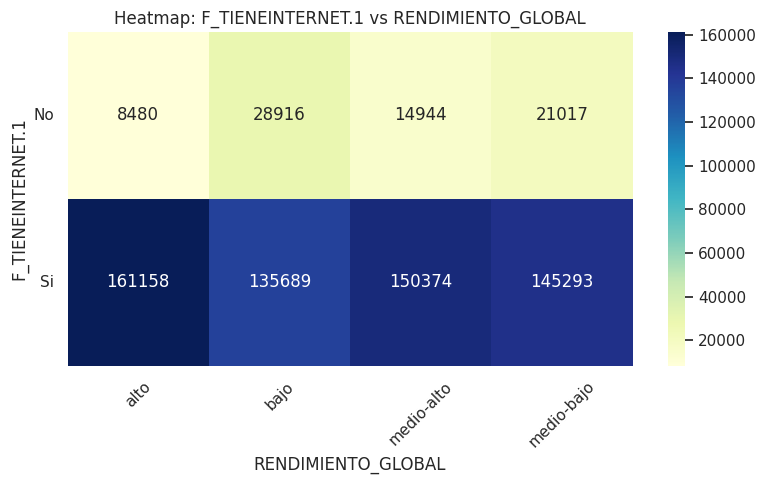

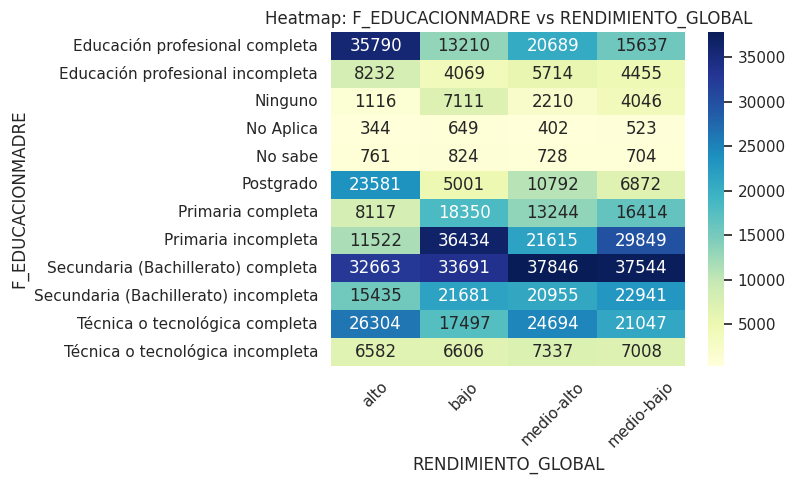

In [18]:
cat_cols = d_train.select_dtypes(include=['category', 'object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'RENDIMIENTO_GLOBAL']

for col in cat_cols:
    tabla = pd.crosstab(d_train[col], d_train['RENDIMIENTO_GLOBAL'])

    plt.figure(figsize=(8, 5))
    sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')

    plt.title(f'Heatmap: {col} vs RENDIMIENTO_GLOBAL')
    plt.xlabel('RENDIMIENTO_GLOBAL')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()